# 有一个单细胞生物，生活在糖水和盐水混合物中，糖水盐水在不停的流动，它有两个鞭毛，分别可以感知糖水和盐水，当总浓度到达一定值时，就会吃这些糖水盐水



![](神经元.png)  ![](ANN.jpg)


# 但是，同时吃进糖水和盐水，会造成细胞结石，有损细胞健康


# 慢慢地，单细胞生物慢慢和其它细胞一起，组成了多细胞生物，进化出了一个能力，有糖水吃糖水，有盐水吃盐水，同时都有的话就不吃，防止细胞里面无法同时消化两种物体。

![](多神经元.png)
![](ANNNetwork.jpg)

# 下面，我们用人工神经元网络来模拟从单细胞到多细胞的进化过程
# 首先，画出最终的输入输出函数3维曲线。

In [ ]:
画出它的输入输出函数3D图
提示：Z=numpy.logical.xor(X,Y)

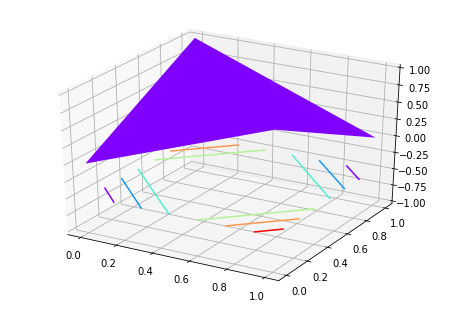

[[0 1]
 [0 1]]
[[0 0]
 [1 1]]
[[False  True]
 [ True False]]


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=numpy.arange(0,2,1)
x2=numpy.arange(0,2,1)

X,Y=np.meshgrid(x1, x2)    # x-y 平面的网格
Z=numpy.logical_xor(X,Y)

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.contour(X, Y, Z, offset = -0.5, cmap = 'rainbow')
ax.set_zlim(-1, 1)

plt.show()

print(X)
print(Y)
print(Z)



# 所以，人工神经元有2输入，1输出


![](xorann.png)

# 首先，尝试用单细胞线性加权

![](line1ann.png)

# 定义NN输入输出函数

In [124]:
def NNWadd(x1,x2):
    X=x1,x2    
    print(X)
    w1=1
    w2=1
    R=numpy.add(w1*x1,w2*x2)
    return R
         

    

# 画出NNWadd的三维图

(array([[0, 1],
       [0, 1]]), array([[0, 0],
       [1, 1]]))


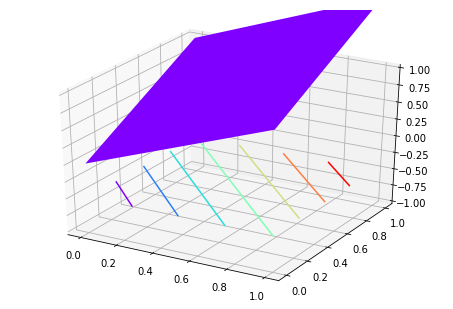

[[0 1]
 [1 2]]


In [125]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x1=numpy.arange(0,2,1)
x2=numpy.arange(0,2,1)

X,Y=np.meshgrid(x1, x2)    # x-y 平面的网格
     
ZADD=NNWadd(X,Y)

ax.plot_surface(X, Y, ZADD, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))
ax.contour(X, Y, ZADD, offset = -0.5, cmap = 'rainbow')
ax.set_zlim(-1, 1)

plt.show()

print(ZADD)

# 分析一下权值的可能性

### x1w1   x2w2  输出
### 0 x w1  +  0 x w2    0
### 1 x w1  +  0 x w2    1
### 0 x w1  +  1 x w2    1
### 1 x w1  +  1 x w2    0

# 可以得出w1=1  w2=1 

# 但是和第四式严重矛盾 


# 引入更多权值,多加一个细胞

![](lin1w3w4.png)

### x1w1   x2w2  输出
### 0 x w1  +  0 x w2   + 0 x w3 + 0 x w4    0
### 1 x w1  +  0 x w2   + 1 x w3 + 0 x w4    1
### 0 x w1  +  1 x w2   + 0 x w3 + 1 x w4    1
### 1 x w1  +  1 x w2   + 1 x w3 + 1 x w4    0

# 求解方程
###                                                              = 0 
###       w1                       + w3                   = 1
###                   w2                            + w4  = 1
###       w1        w2              w3           w4  = 0

# 试解
###                                                             = 0
###       2                            -1                     = 1
###                   2                                -1     = 1
###      2           2               -1             -1      = 2



# 引入激励函数

![](lin1w3w4sig.png)

In [ ]:
# 引入sigmod非线性

### sigmod(2)                    sigmod(-1)     = ?
### sigmod(2)                    sigmod(-1)     = ?
### sigmod(4)                    sigmod(-2)     = ?

试计算问号里的值


In [108]:
x=-10
print(1/(1+np.exp(-x)))
x=0
print(1/(1+np.exp(-x)))
x=2
print(1/(1+np.exp(-x)))
x=-1
print(1/(1+np.exp(-x)))
x=4
print(1/(1+np.exp(-x)))
x=-2
print(1/(1+np.exp(-x)))


4.53978687024e-05
0.5
0.880797077978
0.26894142137
0.982013790038
0.119202922022


In [ ]:
### sigmod(0)                    sigmod(0)      = 0.5  + 0.5  = 1
### sigmod(2)                    sigmod(-1)     = 0.88 + 0.27 = 1.14
### sigmod(2)                    sigmod(-1)     = 0.88 + 0.26 = 1.14
### sigmod(4)                    sigmod(-2)     = 0.98 + 0.12 = 1


# 试解以下方程

In [165]:
0.5  x w5 + 0.5  w6 = 0
0.88 x w5 + 0.27 w6 = 1
0.98 x w5 + 0.12 w6 = 0





SyntaxError: invalid syntax (<ipython-input-165-9aeb35157dbb>, line 1)

# 尝试1

In [146]:
w5=-1
w6=5


In [166]:
print(0.5*w5+0.5*w6)
print(0.88*w5+0.27*w6)
print(0.98*w5+0.12*w6)

10.0
11.5
11.0


# 尝试2

In [156]:
w5=-2
w6=-10

In [157]:
print(0.5*w5+0.5*w6)
print(0.88*w5+0.26*w6)
print(0.98*w5+0.11*w6)

-6.0
-4.36
-3.06


# 引入第三个神经元，实施偏置

![](lin1w7.png)

0.5  x w5 + 0.5  w6 + 1 x w7= 0
0.88 x w5 + 0.26 w6 + 1 x w7= 1
0.98 x w5 + 0.11 w6 + 1 x w7= 0


# 试算w5,w6,w7

In [212]:
w5=30
w6=20
w7=-24

o1=0.5*w5+0.5*w6+w7
o2=0.88*w5+0.27*w6+w7
o3=0.98*w5+0.12*w6+w7

print(o1,o2,o3)


1.0 7.799999999999997 7.799999999999997


![](lin1w7sig.png)

In [211]:
OV=np.array([o1,o2,o3])
print(OV)
print(1/(1+np.exp(-OV)))

[ 1.   1.7 -0.8]
[ 0.73105858  0.84553473  0.31002552]
